# Fundamentals of Machine Learning - Exercise 2
* The aim of the exercise is to learn basic techniques for visualization creation and interpretation using Matplotlib and Seaborn libraries.

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_02.png?raw=true)

# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [15]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [16]:
df_full = pd.read_csv("https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv")
df_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Price is the most interisting attribute in our dataset, let's take a look on its distribution
- SalePrice

## Vizualize house prices in form of histogram
- What does it tell us about the prices?

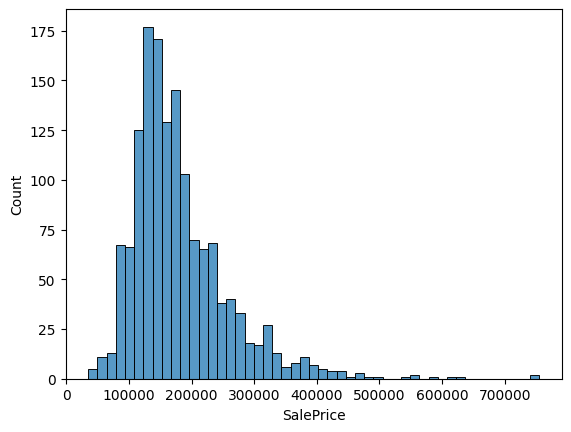

In [17]:
sns.histplot(x=df_full.SalePrice)
plt.show()

### Modify bins
- Perhaps we want to visualize the histogram with more dense or coarse bins
- *bins* attribute

<Axes: xlabel='SalePrice', ylabel='Count'>

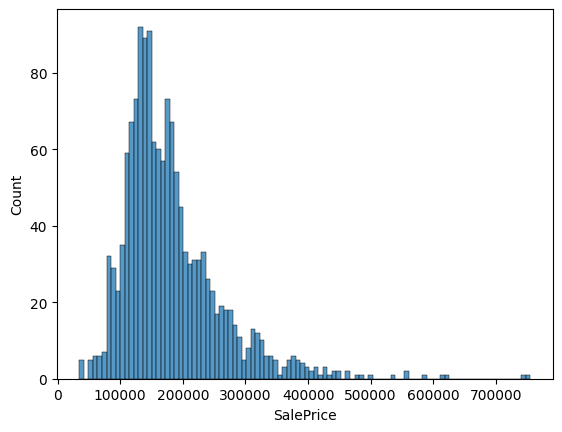

In [18]:
sns.histplot(x=df_full.SalePrice, bins=100)

### Use quartiles (Q1, Q3) for highlighting most common price range in histogram

* Check functions *describe* and *quantile* over price column

In [19]:
# q1 = df_full.SalePrice.quantile(0.25)
# q3 = df_full.SalePrice.quantile(0.75)

# sns.histplot(x=df_full.SalePrice, bins=100)
# plt.axvline(q1, color='red', linestyle='--', label='Q1 (25th percentile)')
# plt.axvline(q3, color='green', linestyle='--', label='Q3 (75th percentile)')
# plt.legend()
# plt.show()


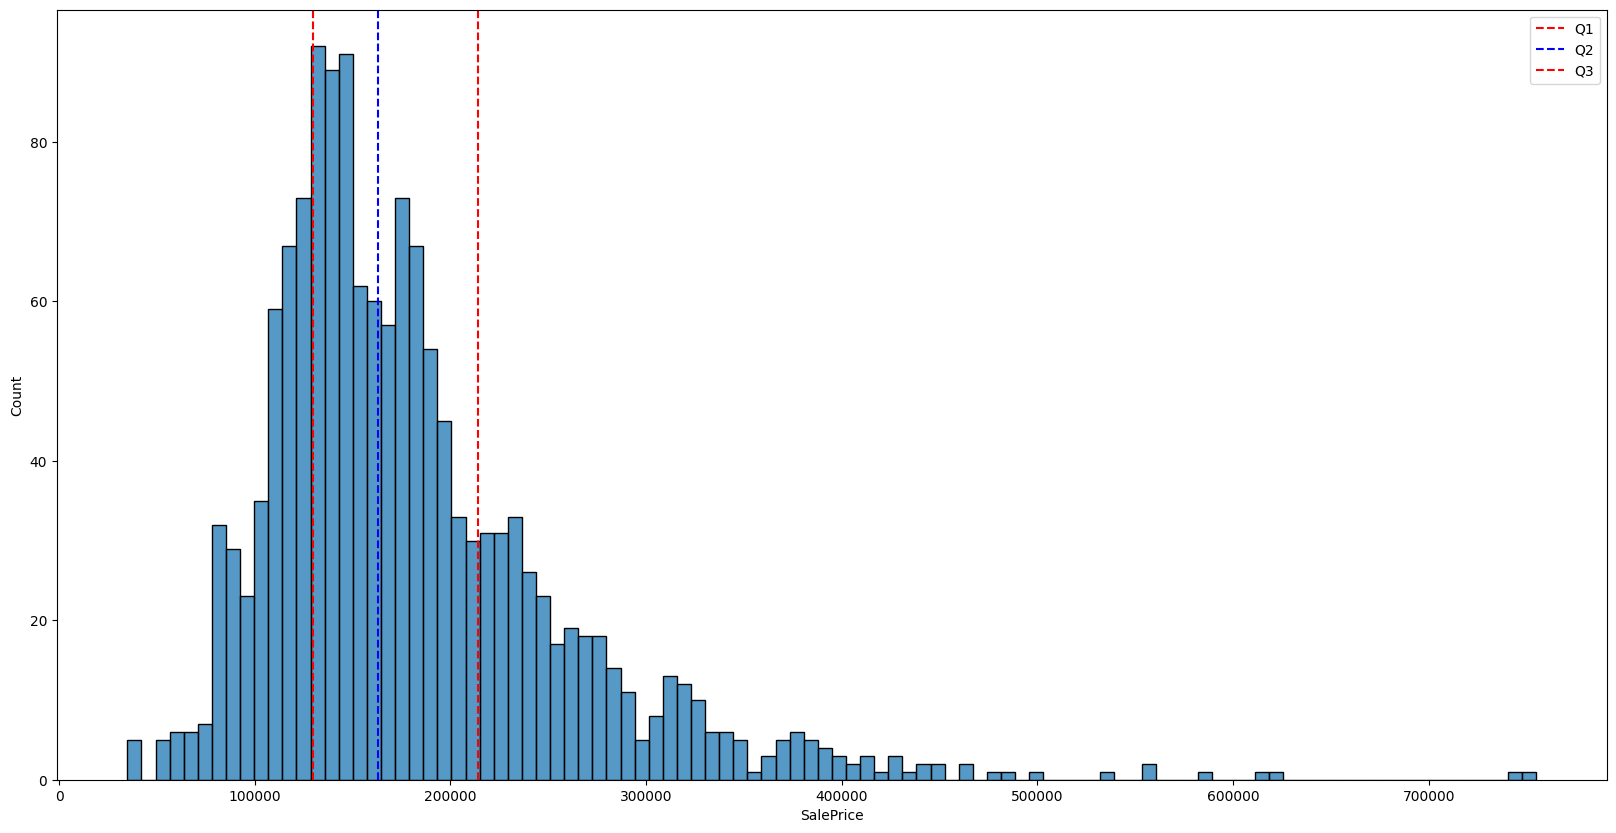

In [20]:
q1, q2, q3 = df_full.SalePrice.quantile([0.25, 0.5, 0.75])
q1, q2, q3
# df_full.SalePrice.describe()
plt.figure(figsize=(20, 10))
sns.histplot(x=df_full.SalePrice, bins=100)
plt.axvline(q1, color='red', linestyle='--', label='Q1')
plt.axvline(q2, color='blue', linestyle='--', label='Q2')
plt.axvline(q3, color='red', linestyle='--', label='Q3')
plt.legend()
plt.show()


In [21]:
df_full.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
df_full.SalePrice.quantile()

np.float64(163000.0)

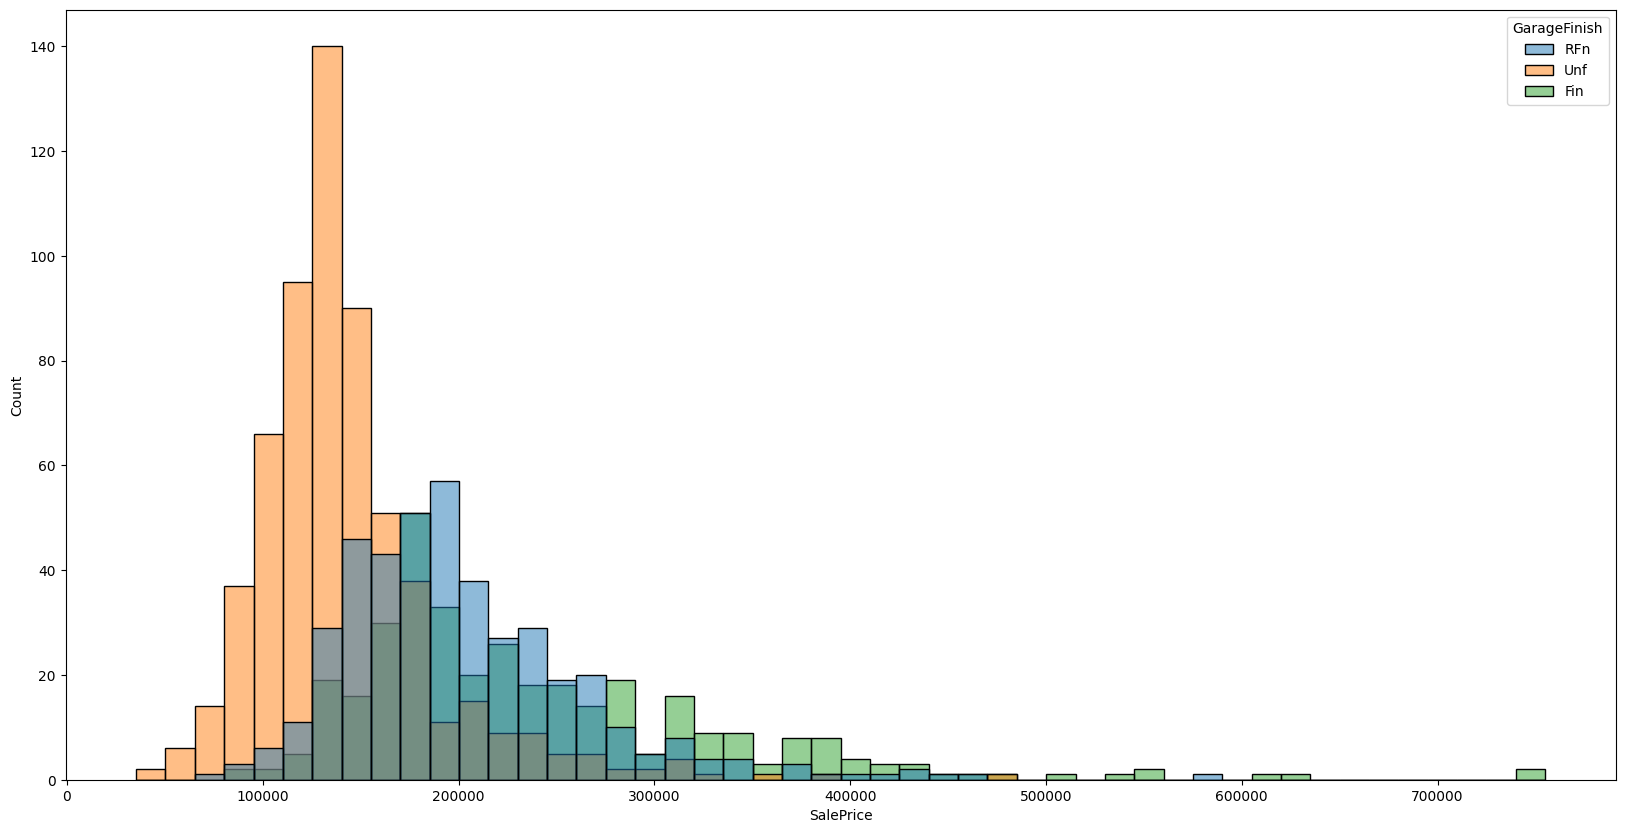

In [23]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df_full, x=df_full.SalePrice, hue=df_full.GarageFinish)
plt.show()

## 🔎 What can we say about prices based on the quantiles?
### Use function *axvline* from Matplotlib to draw vertical lines at the quartile positions

In [24]:
plt.figsize(figsize=(20, 10))


AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

## 📊 Let's add more complexity to histogram vizualizations. 
### Does price change for different values of GaragaFinish attribute?

### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished	
- Unf	Unfinished
- NA	No Garage

<Axes: xlabel='SalePrice', ylabel='Count'>

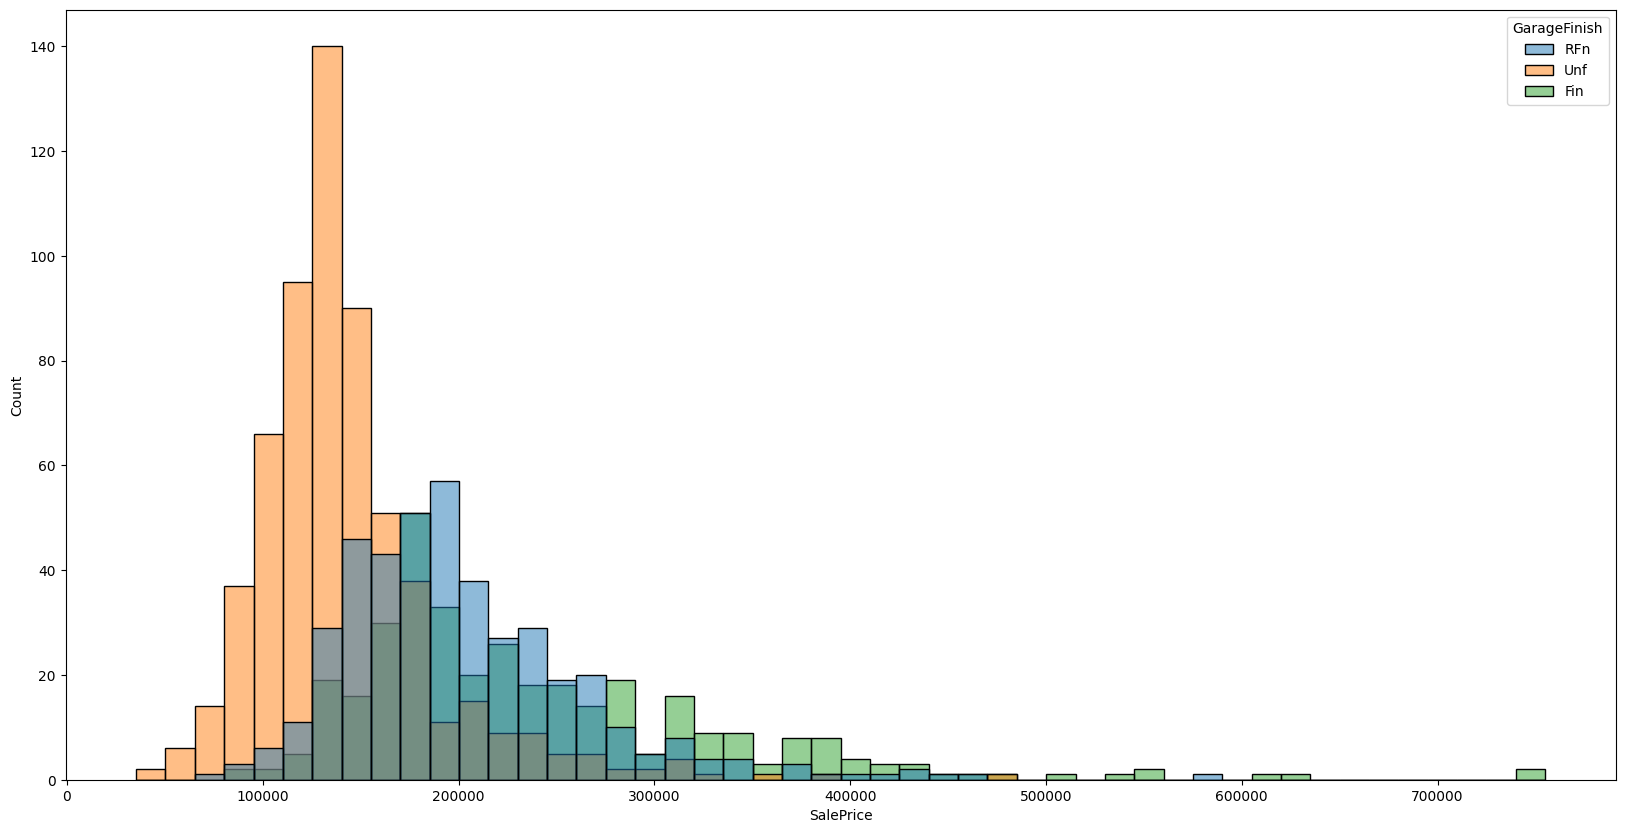

In [ ]:
# df_full[ [c  for c in df_full.columns if 'Garage' in c] ].value_counts(dropna=False)
# data = df_full.groupby(df_full.GarageFinish, dropna=False).Id.count().reset_index(name="Count")
# sns.histplot(x=data.GarageFinish, y=data.Count)
# data
plt.figure(figsize=(20, 10))
sns.histplot(x=df_full.SalePrice, hue=df_full.GarageFinish)

### 💡 We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

### Fill nan values with 'NoGarage' string

In [ ]:
# df_full.loc[df_full.GarageFinish.isna(), [c for c in df_full.columns if 'Garage' in c]] = 'NoGarage'
# df_full.GarageFinish = df_full.GarageFinish.fillna('NoGarage')
df_full.GarageFinish.value_counts()


GarageFinish
Unf         605
RFn         422
Fin         352
NoGarage     81
Name: count, dtype: int64

### Take a look at the histogram again

In [ ]:
# df_full.loc[df_full.GarageType.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## 💡 Sometimes the histograms distinguished by colors are not easily redeable
- We can use *col* attribute to automatically plot every histogram on its own canvas

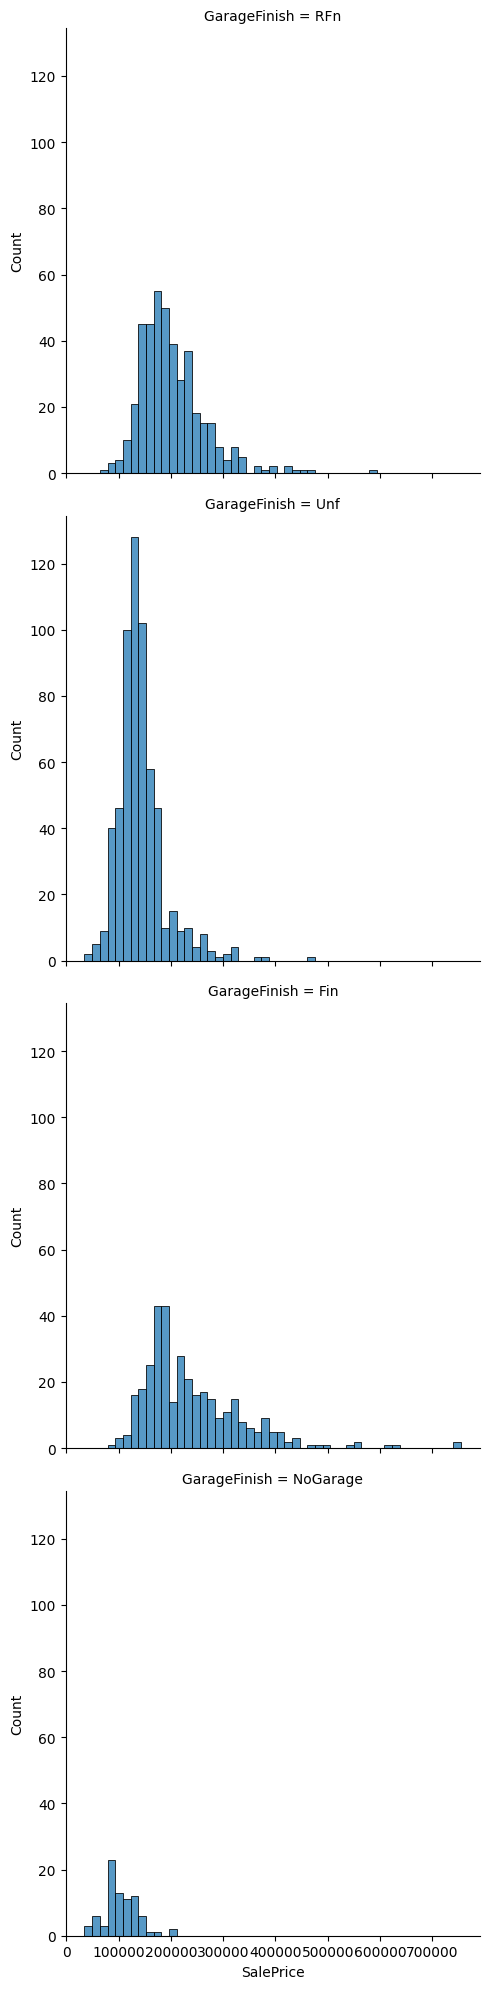

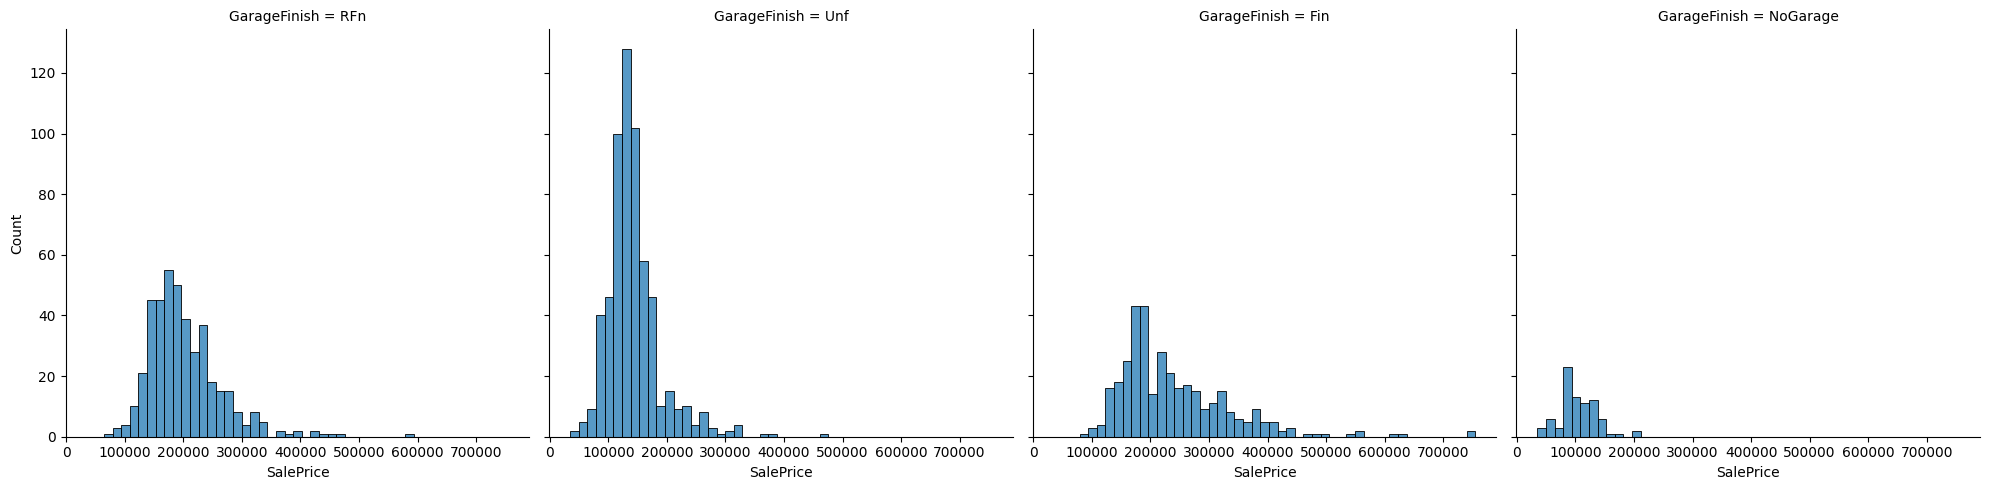

In [ ]:
sns.displot(x=df_full.SalePrice, row=df_full.GarageFinish)
sns.displot(x=df_full.SalePrice, col=df_full.GarageFinish)


# 📊 Another very useful tecnique for the numerical features distributions are boxplots
- 🔎 Did you see any of these before?

- 🔎 How should we read boxplots?
    - **Quartiles**
    - **Median**
    - Box size
    - **Outliers and IQR**
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

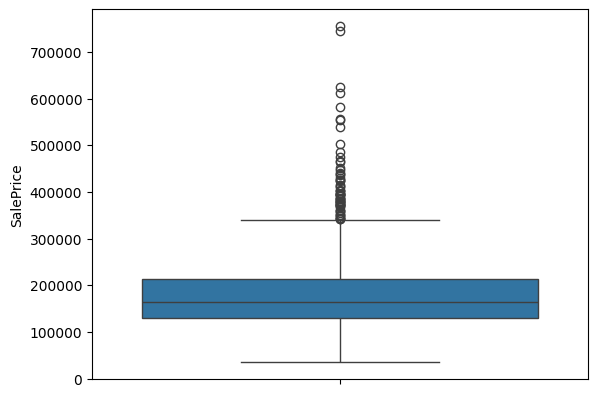

<Figure size 1000x3000 with 0 Axes>

In [ ]:
sns.boxplot(y=df_full.SalePrice)
plt.figure(figsize=(10, 30))
df_full.SalePrice.describe()
plt.show()

## Let's take a look at the *SalePrice* for different *BldgType* values 
- 🔎 What can we say about the prices?

<Axes: xlabel='BldgType', ylabel='SalePrice'>

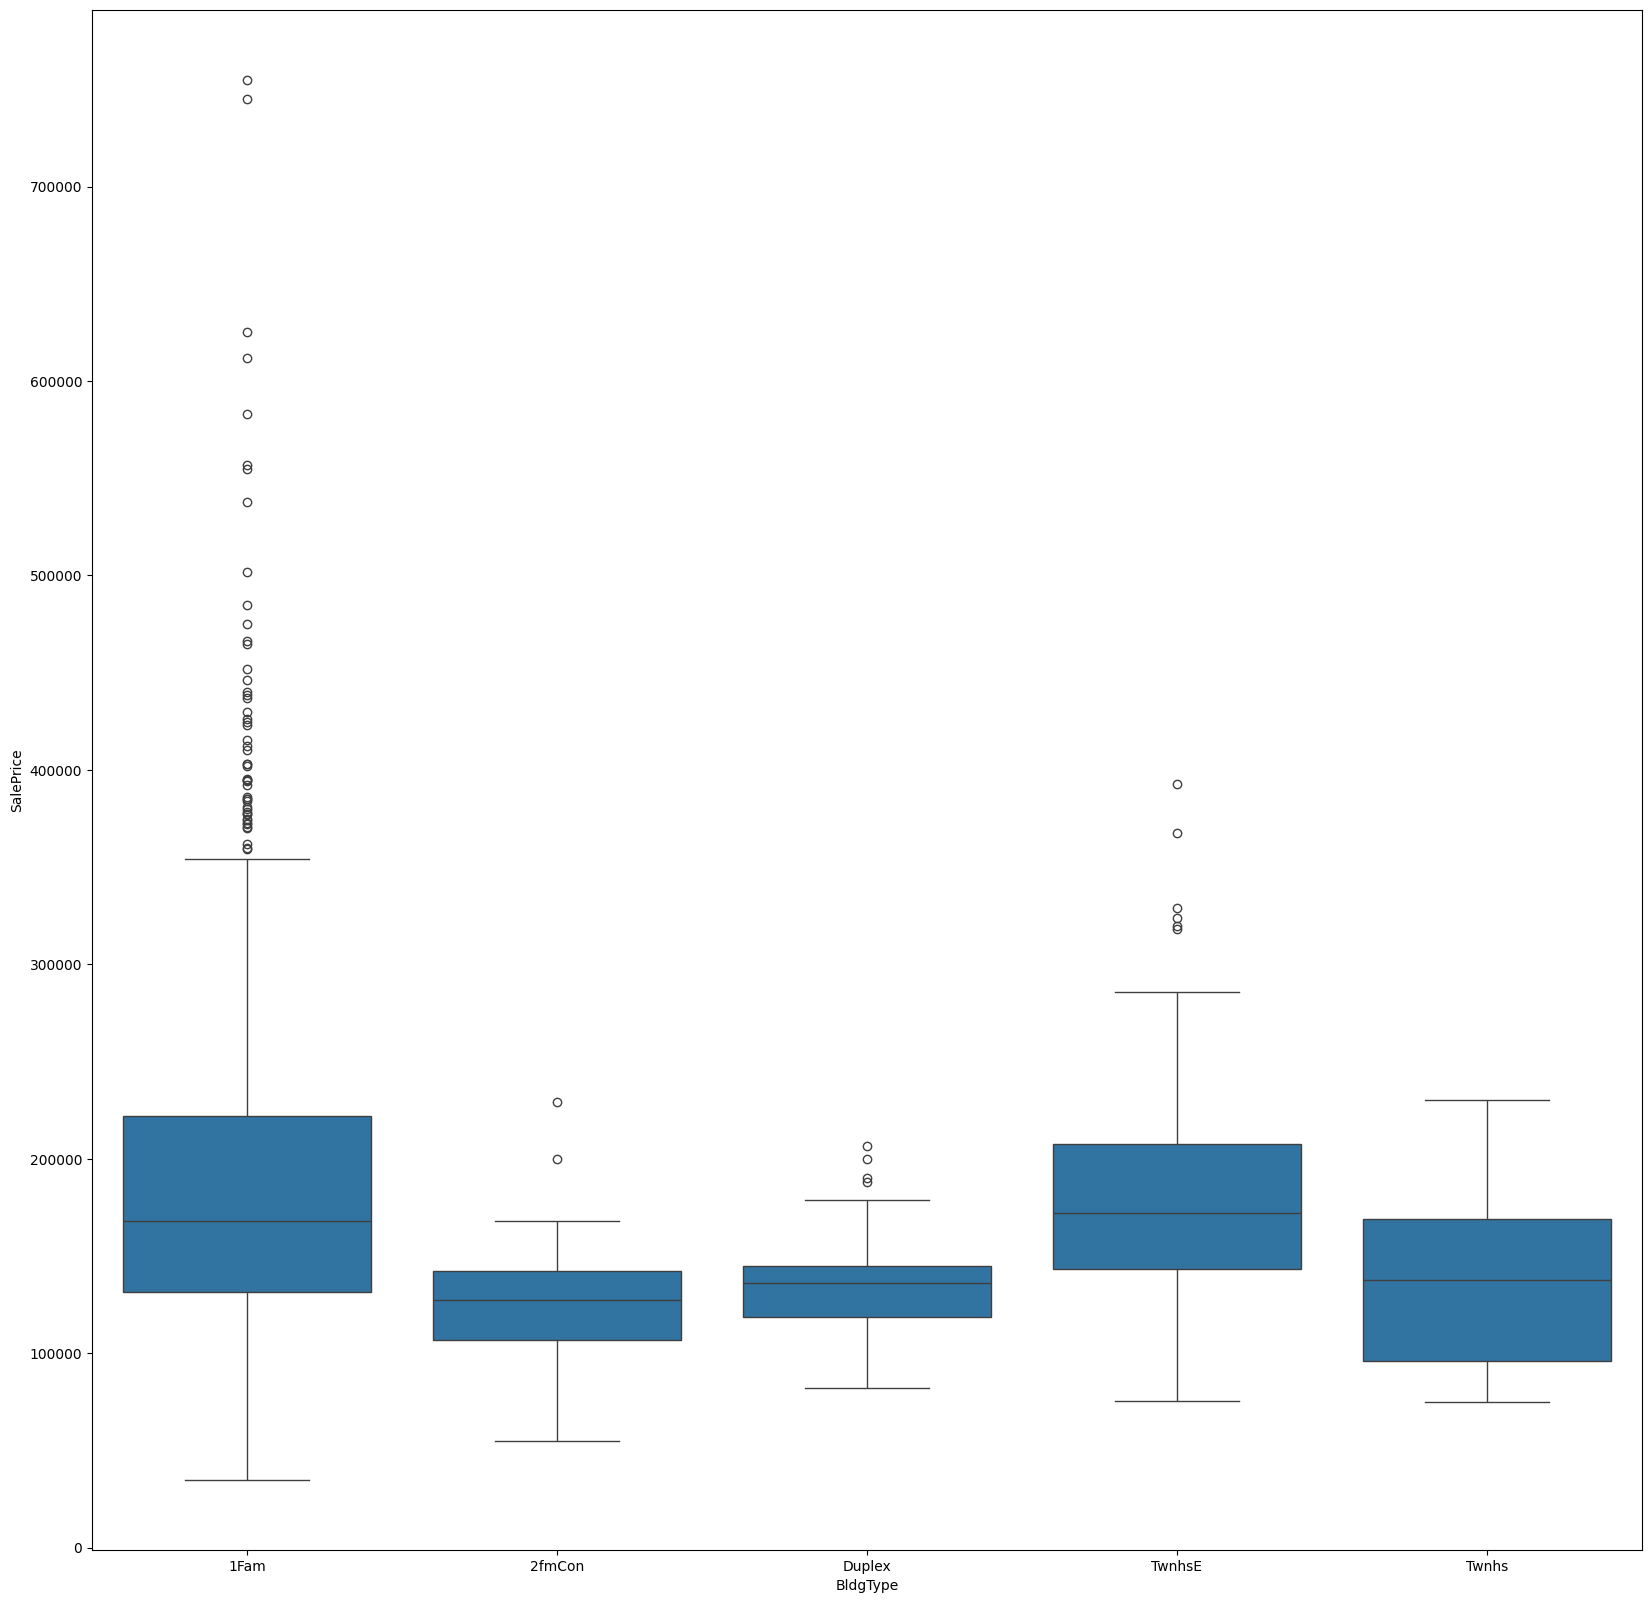

In [ ]:
plt.figure(figsize=(20, 20))
sns.boxplot(x=df_full.BldgType, y=df_full.SalePrice)

## We can do the same for *GrLivArea*

<Axes: xlabel='BldgType', ylabel='GrLivArea'>

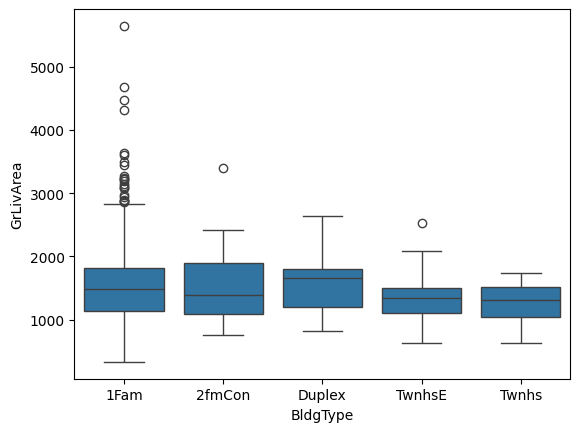

In [ ]:
sns.boxplot(x=df_full.BldgType, y=df_full.GrLivArea)

## Let's take a look at the *GrLivArea* for different *BldgType* values 
- 🔎 What can we say about the GrLivArea?

# 📊 Scatter plots are commonly used for visualizing two numerical variables

### We can use standard *scatterplot* with *BldgType* as a *hue* so we can better grasp the relationship between *GrLivArea* and *SalePrice*
* Try to set *alpha* parameter for opacity settings

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

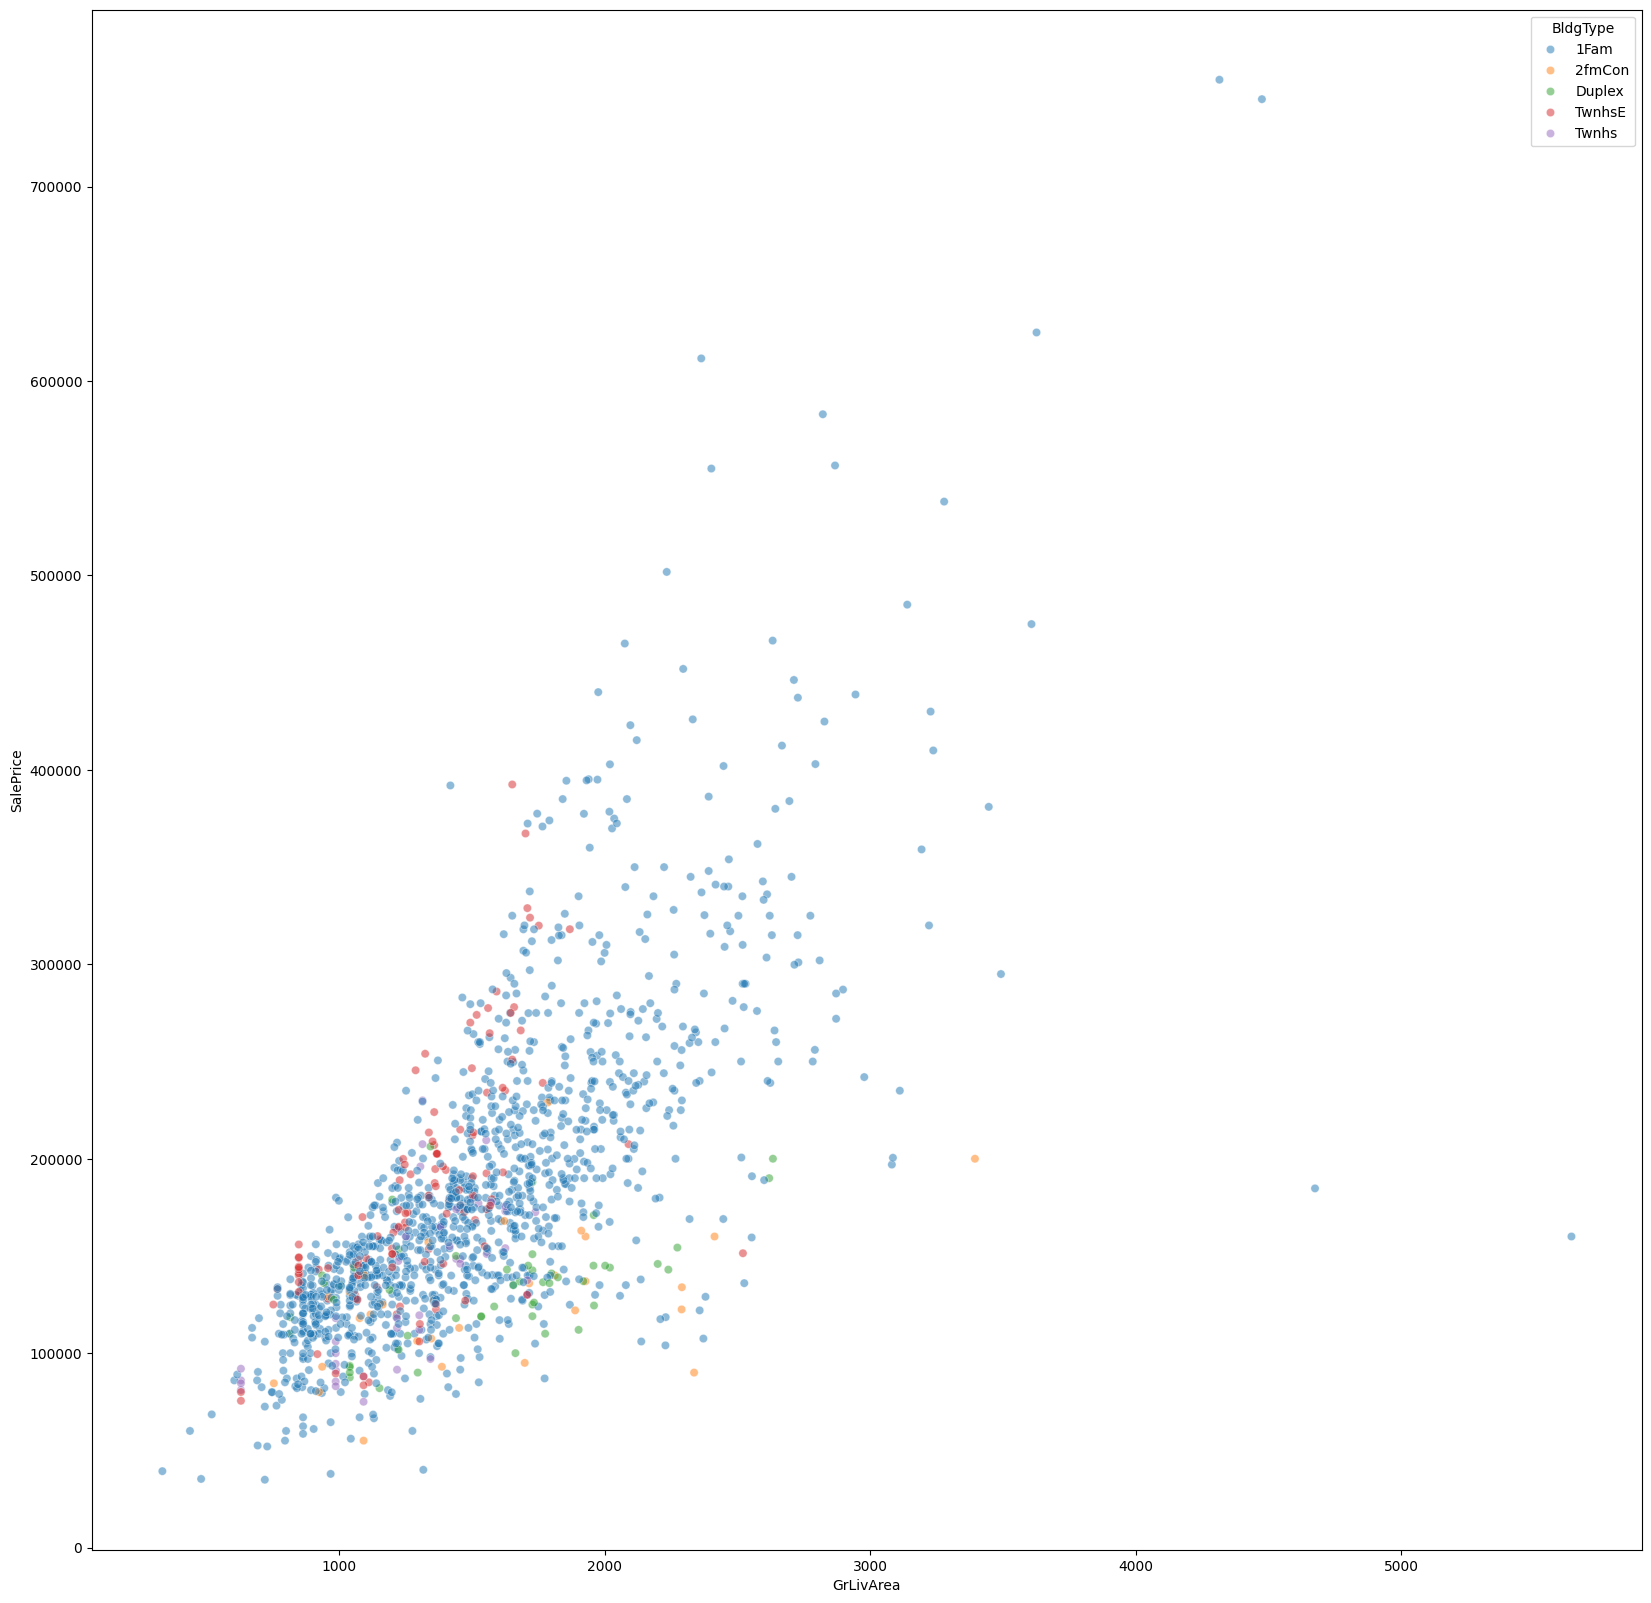

In [ ]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x=df_full.GrLivArea, y=df_full.SalePrice, hue=df_full.BldgType, alpha=0.5)

### We can see there are some outliers in the data, let's zoom only to area without them, how can we filter the data?

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

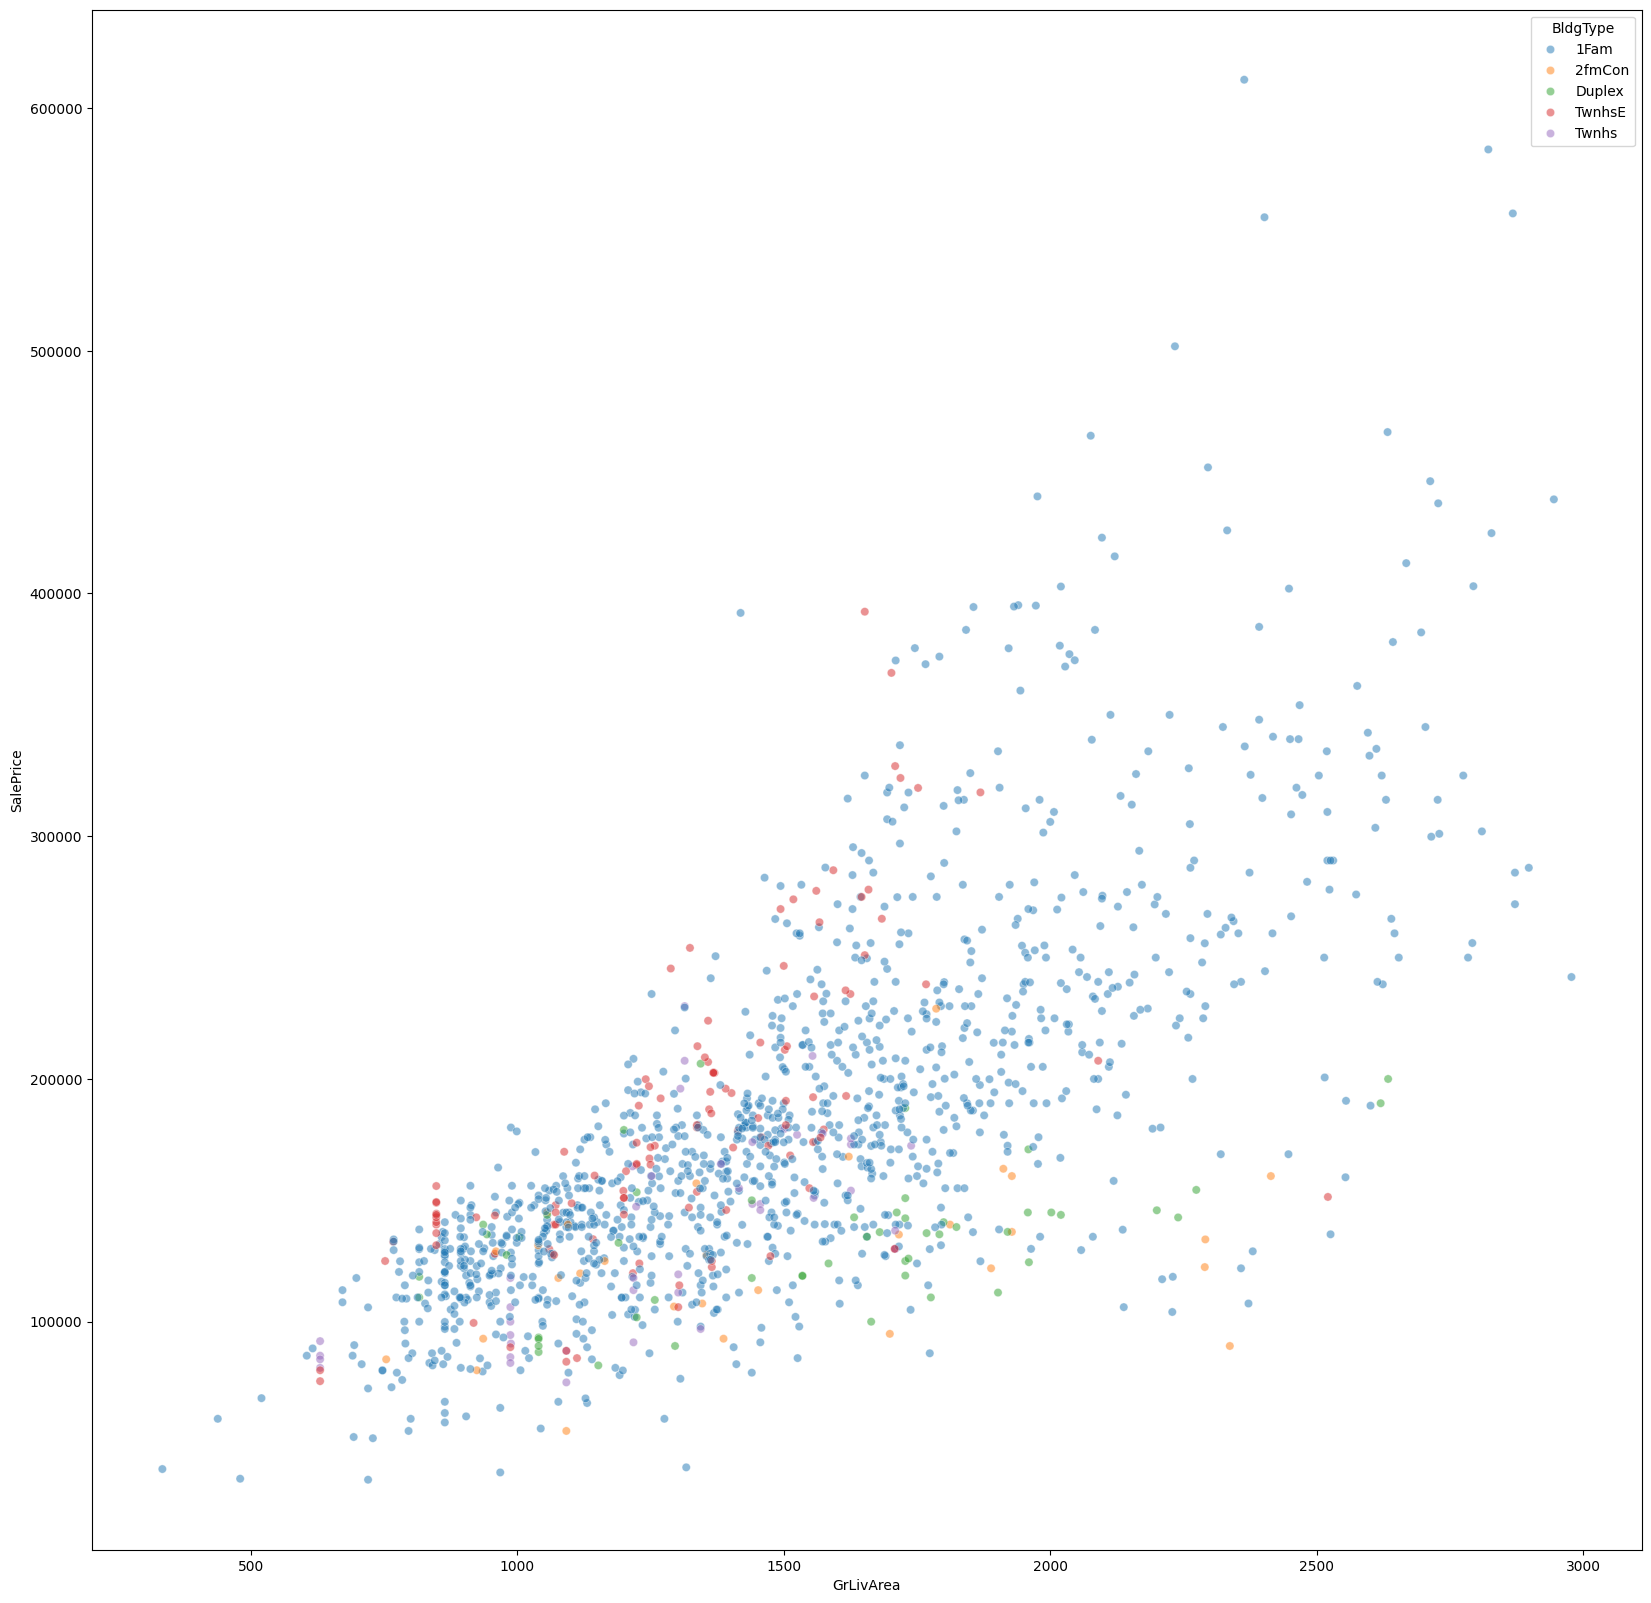

In [ ]:
plt.figure(figsize=(20, 20))

sns.scatterplot(data=df_full.loc[df_full.GrLivArea < 3000], 
                x=df_full.GrLivArea.name, 
                y=df_full.SalePrice.name, 
                hue=df_full.BldgType, alpha=0.5)

# We have an information about a month and a year for the sold houses.
## 🔎 Can you vizualize what was the average price of the house by quarters?

* We need to create a new column **YearQuarterSold** with merged Year and Quarter information in this pattern: '2010-1','2010-2' and so on first
    * We can map the values using the *apply* function or use string concatenation directly
* 💡 If you need to change data type of the columns, you can use *astype*

In [28]:
df_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [29]:
df_full['QuarterSold'] = (df_full.MoSold + 2) // 3
df_full['YearQuarterSold'] = df_full.YrSold.astype(str) + '-' + df_full.QuarterSold.astype(str)


In [30]:
df_full['YearQuarterSold']

0       2008-1
1       2007-2
2       2008-3
3       2006-1
4       2008-4
         ...  
1455    2007-3
1456    2010-1
1457    2010-2
1458    2010-2
1459    2008-2
Name: YearQuarterSold, Length: 1460, dtype: object

### Compute the average price for the *YearQuarterSold* attribute

In [31]:
df_full.groupby(df_full.YearQuarterSold).SalePrice.mean()


YearQuarterSold
2006-1    190553.522727
2006-2    168277.176991
2006-3    191858.980952
2006-4    187993.480769
2007-1    178489.159091
2007-2    174689.232000
2007-3    190919.156863
2007-4    207781.827586
2008-1    173837.951220
2008-2    173518.391304
2008-3    180246.863158
2008-4    183250.415094
2009-1    180749.414634
2009-2    177229.213115
2009-3    189046.531532
2009-4    166112.437500
2010-1    185384.413043
2010-2    177119.593496
2010-3    121750.000000
Name: SalePrice, dtype: float64

## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '2006-1'),
  Text(1, 0, '2006-2'),
  Text(2, 0, '2006-3'),
  Text(3, 0, '2006-4'),
  Text(4, 0, '2007-1'),
  Text(5, 0, '2007-2'),
  Text(6, 0, '2007-3'),
  Text(7, 0, '2007-4'),
  Text(8, 0, '2008-1'),
  Text(9, 0, '2008-2'),
  Text(10, 0, '2008-3'),
  Text(11, 0, '2008-4'),
  Text(12, 0, '2009-1'),
  Text(13, 0, '2009-2'),
  Text(14, 0, '2009-3'),
  Text(15, 0, '2009-4'),
  Text(16, 0, '2010-1'),
  Text(17, 0, '2010-2'),
  Text(18, 0, '2010-3')])

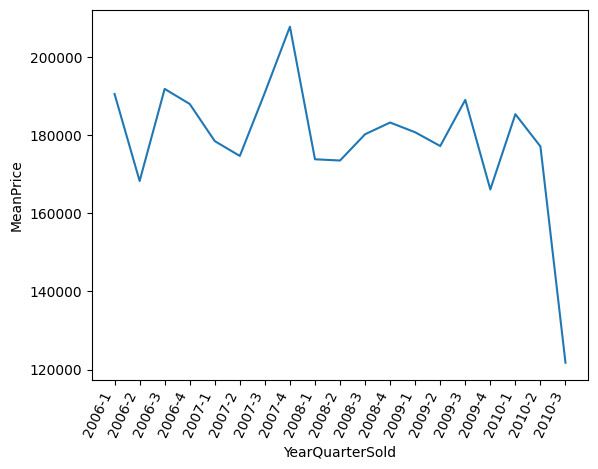

In [32]:
data = df_full.groupby(df_full.YearQuarterSold).SalePrice.mean().reset_index(name="MeanPrice")
sns.lineplot(
    x=data.YearQuarterSold,
    y=data.MeanPrice,
)
plt.xticks(rotation=65, horizontalalignment='right')


### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [33]:
df_full.groupby('YearQuarterSold').SalePrice.describe().reset_index()

,YearQuarterSold,count,mean,std,min,25%,50%,75%,max
0,2006-1,44.0,190553.522727,71075.435079,52500.0,142875.0,172700.0,228250.0,423000.0
1,2006-2,113.0,168277.176991,69911.153137,79000.0,124000.0,151400.0,197000.0,475000.0
2,2006-3,105.0,191858.980952,89590.623994,80500.0,133000.0,173900.0,225000.0,625000.0
3,2006-4,52.0,187993.480769,81497.678182,35311.0,135375.0,161500.0,231375.0,438780.0
4,2007-1,44.0,178489.159091,119137.563987,39300.0,122000.0,145450.0,200125.0,755000.0
5,2007-2,125.0,174689.232000,67540.070823,79000.0,129000.0,155000.0,195000.0,430000.0
6,2007-3,102.0,190919.156863,91880.502412,64500.0,134250.0,169750.0,217250.0,745000.0
7,2007-4,58.0,207781.827586,76748.133942,67000.0,144000.0,197450.0,264175.0,392000.0
8,2008-1,41.0,173837.951220,73278.323817,55000.0,127000.0,159895.0,192000.0,412500.0
9,2008-2,115.0,173518.391304,64384.079684,68500.0,132750.0,161000.0,200000.0,385000.0


![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_01.png?raw=true)

In [34]:
df_agg = df_full.groupby('YearQuarterSold').SalePrice.describe().reset_index()
# Creates a new dataframe with variable 
# YearQuarterSold is the id
# for each id there are min, mean, 50%, max variables
# therefore count(YearQuarterSold) * 4 = total number of rows
df_melt = pd.melt(
    df_agg, 
    id_vars=df_agg.YearQuarterSold.name, 
    value_vars=['min', 'mean', '50%', 'max']
)
df_melt
df_agg

,YearQuarterSold,count,mean,std,min,25%,50%,75%,max
0,2006-1,44.0,190553.522727,71075.435079,52500.0,142875.0,172700.0,228250.0,423000.0
1,2006-2,113.0,168277.176991,69911.153137,79000.0,124000.0,151400.0,197000.0,475000.0
2,2006-3,105.0,191858.980952,89590.623994,80500.0,133000.0,173900.0,225000.0,625000.0
3,2006-4,52.0,187993.480769,81497.678182,35311.0,135375.0,161500.0,231375.0,438780.0
4,2007-1,44.0,178489.159091,119137.563987,39300.0,122000.0,145450.0,200125.0,755000.0
5,2007-2,125.0,174689.232000,67540.070823,79000.0,129000.0,155000.0,195000.0,430000.0
6,2007-3,102.0,190919.156863,91880.502412,64500.0,134250.0,169750.0,217250.0,745000.0
7,2007-4,58.0,207781.827586,76748.133942,67000.0,144000.0,197450.0,264175.0,392000.0
8,2008-1,41.0,173837.951220,73278.323817,55000.0,127000.0,159895.0,192000.0,412500.0
9,2008-2,115.0,173518.391304,64384.079684,68500.0,132750.0,161000.0,200000.0,385000.0


## What can we say about the minimum and maximum values?
- 💡Take a look at std. deviation

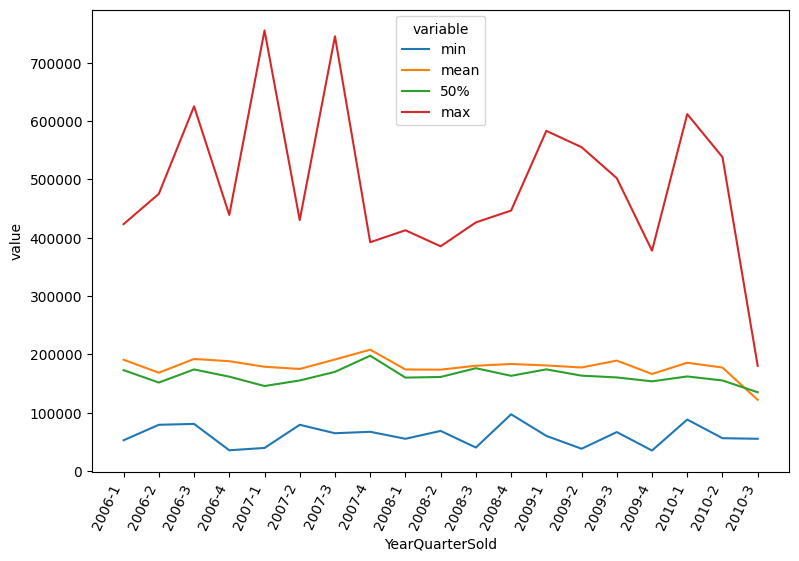

In [35]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(
    data = df_melt, 
    x = 'YearQuarterSold', 
    y = 'value', 
    hue = 'variable'
    )
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# We can take a look at number of sold houses for the defined time periods as well
## 📊 We will use standard bar plot
- 🔎 In which quarter were the most houses sold?
- 💡 Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

In [36]:
df_full.groupby(df_full.YearQuarterSold).Id.count()

YearQuarterSold
2006-1     44
2006-2    113
2006-3    105
2006-4     52
2007-1     44
2007-2    125
2007-3    102
2007-4     58
2008-1     41
2008-2    115
2008-3     95
2008-4     53
2009-1     41
2009-2    122
2009-3    111
2009-4     64
2010-1     46
2010-2    123
2010-3      6
Name: Id, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '2006-1'),
  Text(1, 0, '2006-2'),
  Text(2, 0, '2006-3'),
  Text(3, 0, '2006-4'),
  Text(4, 0, '2007-1'),
  Text(5, 0, '2007-2'),
  Text(6, 0, '2007-3'),
  Text(7, 0, '2007-4'),
  Text(8, 0, '2008-1'),
  Text(9, 0, '2008-2'),
  Text(10, 0, '2008-3'),
  Text(11, 0, '2008-4'),
  Text(12, 0, '2009-1'),
  Text(13, 0, '2009-2'),
  Text(14, 0, '2009-3'),
  Text(15, 0, '2009-4'),
  Text(16, 0, '2010-1'),
  Text(17, 0, '2010-2'),
  Text(18, 0, '2010-3')])

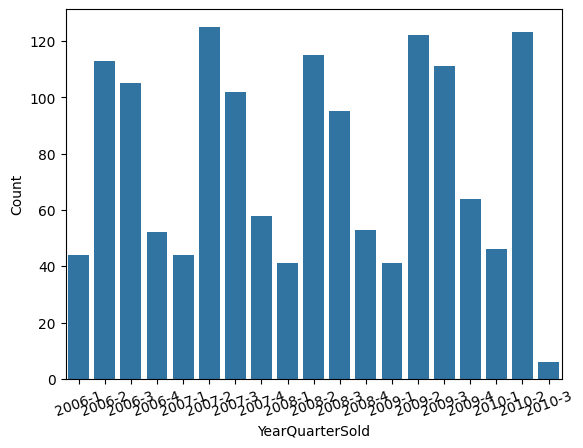

In [37]:
data = df_full.groupby(df_full.YearQuarterSold).Id.count().reset_index(name="Count")
sns.barplot(x=data.YearQuarterSold, y=data.Count)
plt.xticks(rotation=20)

# Tasks (2p)
## ✅ Task 1 - Outlier detection (1p)
- We need to somehow mark the outliers in the data according to the *SalePrice* and *GrLivArea*
    - One possibility is to compute [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) for both columns and mark outliers using lower and upper bounds
    - Lower bound: Q1 - 1.5*IQR
    - Upper bound: Q3 + 1.5*IQR
- 💡 If the house has *SalePrice* **OR** *GrLivArea* value outside of the bounds - it is an outlier
- Vizualize the data using scatter plot and distinguish the outlier and non-outlier data using different colors (*hue*) 💡


In [38]:
q1 = df_full.SalePrice.quantile(0.25)
q2 = df_full.SalePrice.quantile(0.5)
q3 = df_full.SalePrice.quantile(0.75)
q1, q2, q3

(np.float64(129975.0), np.float64(163000.0), np.float64(214000.0))

In [40]:
iqr = q3 - q1
iqr

np.float64(84025.0)

In [41]:
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [42]:
outliers = df_full.loc[~(lower_bound < df_full.SalePrice) | ~(df_full.SalePrice < upper_bound)]
outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,QuarterSold,YearQuarterSold
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,7,2006,New,Partial,345000,3,2006-3
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,0,11,2006,WD,Normal,385000,4,2006-4
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,0,10,2006,New,Partial,438780,4,2006-4
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,10,2007,New,Partial,383970,4,2007-4
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,1,2008,New,Partial,372402,1,2008-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,GdWo,NaN,0,5,2008,WD,Normal,381000,2,2008-2
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,3,2010,WD,Normal,410000,1,2010-1
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,3,2007,WD,Normal,466500,1,2007-1
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,0,10,2009,WD,Normal,377500,4,2009-4


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

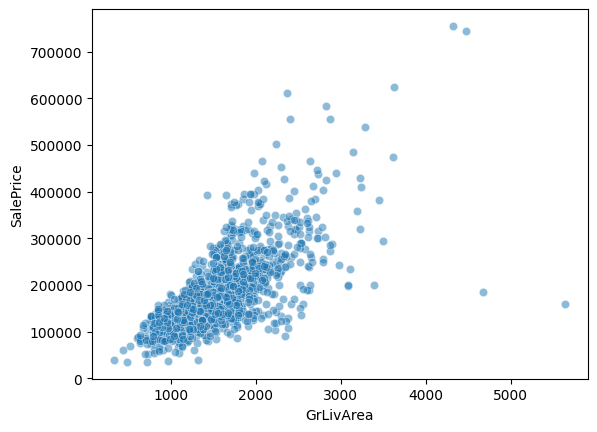

In [43]:
sns.scatterplot(
    data = df_full,
    x = df_full.GrLivArea.name,
    y = df_full.SalePrice.name,
    alpha = 0.5,
)

In [44]:
from functools import reduce

from pandas import DataFrame

def findOutliers(df: DataFrame, column: str):
    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr
    return df.loc[~( (lower_whisker < df[column]) & (df[column] < upper_whisker) )]

def getOutlyingCond(df: DataFrame, column: str):
    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr
    return ~( (lower_whisker < df[column]) & (df[column] < upper_whisker) )


df_full['Outlier'] = False
# this doesn't work because it makes a copy
# findOutliers(df_full, df_full.SalePrice.name)['Outlier'] = True
# findOutliers(df_full, df_full.GrLivArea.name)['Outlier'] = True

df_full.loc[getOutlyingCond(df_full, df_full.SalePrice.name), 'Outlier'] = True
df_full.loc[getOutlyingCond(df_full, df_full.GrLivArea.name), 'Outlier'] = True


In [45]:
df_full.Outlier.value_counts()

Outlier
False    1383
True       77
Name: count, dtype: int64

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

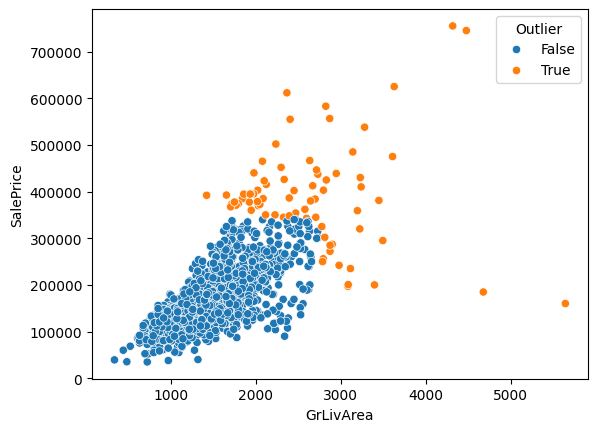

In [46]:
sns.scatterplot(
    data = df_full,
    x = df_full.GrLivArea.name,
    y = df_full.SalePrice.name,
    hue = df_full.Outlier,
)


## ✅ Task 2 - Describe what you see in the data (1p)
- Try to vizualize the relationship between *SalePrice* and *OverallQual*
    - 💡You can use BoxPlots, Scatter plots, etc., the choice of a right plot type is up to you 🙂
- Do the same for *SalePrice* and *OverallCond*; i.e. vizualize and describe insight-
- **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
    - ❌ Plot interpretation figured in real-time during task check is not allowed! ❌


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

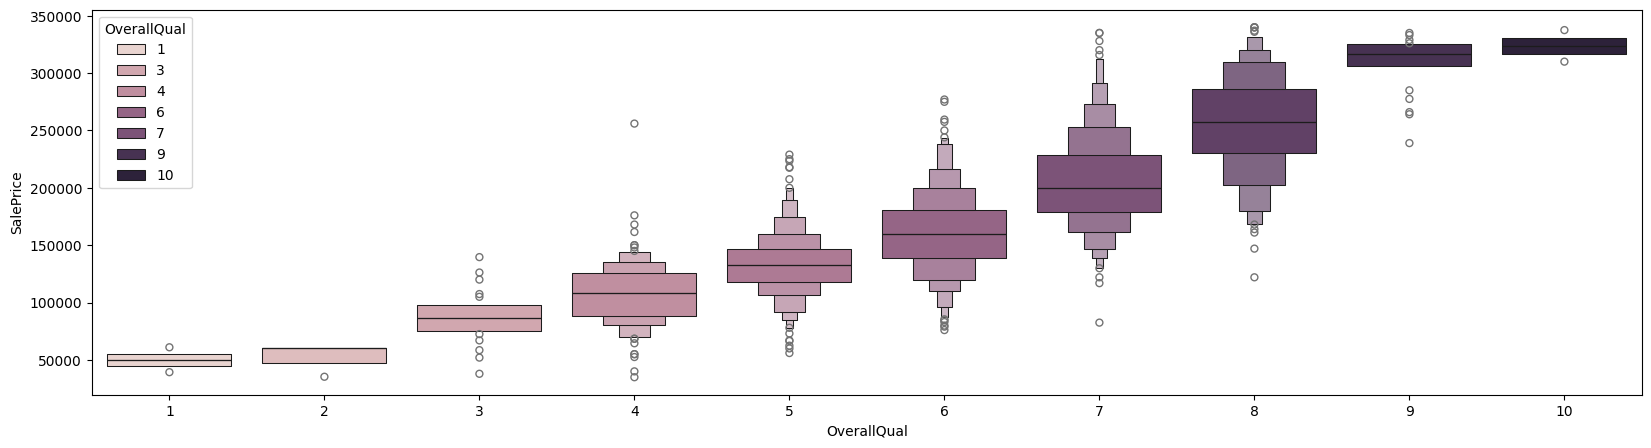

In [56]:
plt.figure(figsize=(20, 5))
sns.boxenplot(
    data = df_full.loc[df_full.Outlier == False],
    y = df_full.SalePrice.name,
    x = df_full.OverallQual,
    hue = df_full.OverallQual
)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

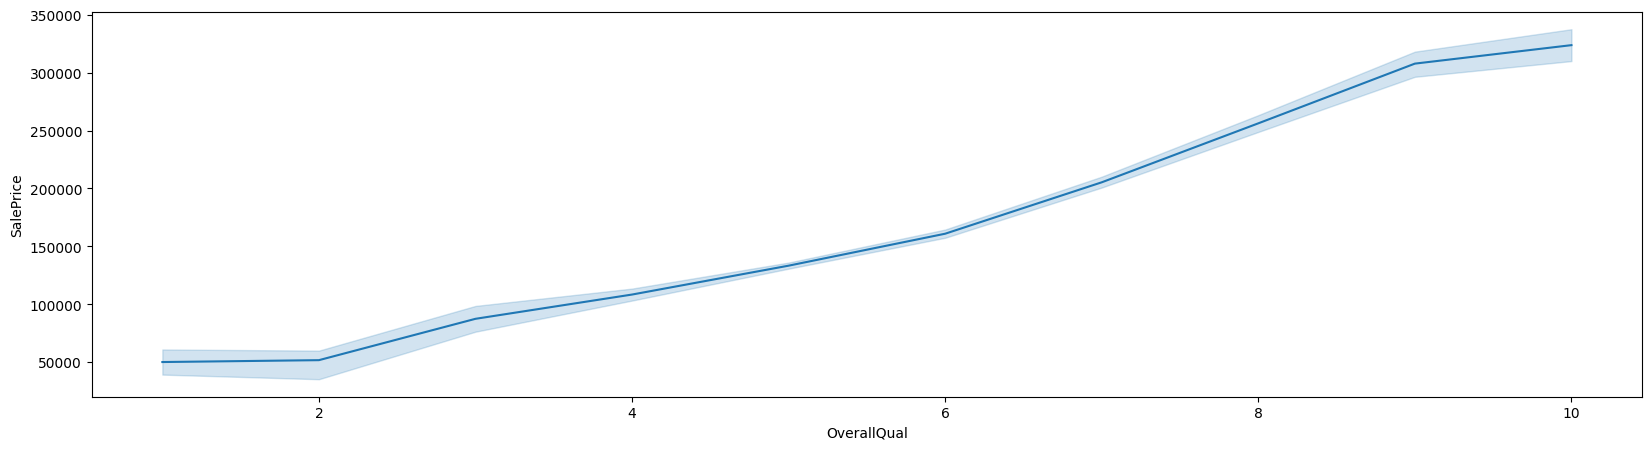

In [54]:
plt.figure(figsize=(20, 5))
sns.lineplot(
    data = df_full.loc[df_full.Outlier == False],
    y = df_full.SalePrice.name,
    x = df_full.OverallQual,
)

# Relationship between Overall Quality and Sale Price

1. We can see a clear corelation between the overall quality of the property as the price increases.

2. There are some outliers. Some are of high quality and are of the same price as ones of lower quality.

Conclusion: But overall the trend of properties being pricier as the quality increases still stands.

---

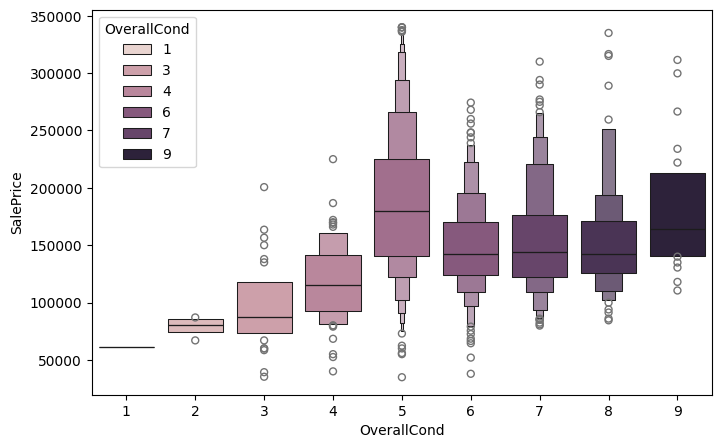

In [58]:
plt.figure(figsize=(8, 5))
sns.boxenplot(
    data = df_full.loc[df_full.Outlier == False],
    x = df_full.OverallCond.name,
    y = df_full.SalePrice.name,
    hue = df_full.OverallCond.name
)
plt.show()

# Relationship between the Overall Condition and Sale Price

Properties with overall condition 5 and up are all priced very similarly.

This means that the trend of higher SalePrice meaning higher OverallCond increases in the beginning but then platues (it drops) around 5th OverallCond.

Another interesting finding is that the properties that are priced the highest have actually worse conditions than props much cheaper than them.
But this could very well be caused by the fact that 5th OverallCond is the most common cond. 

<Axes: xlabel='OverallCond', ylabel='Count'>

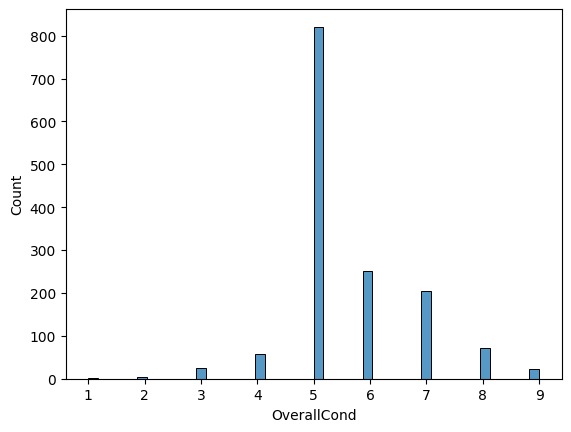

In [50]:
sns.histplot(
    data = df_full.loc[df_full.Outlier == False],
    x = df_full.OverallCond,
)

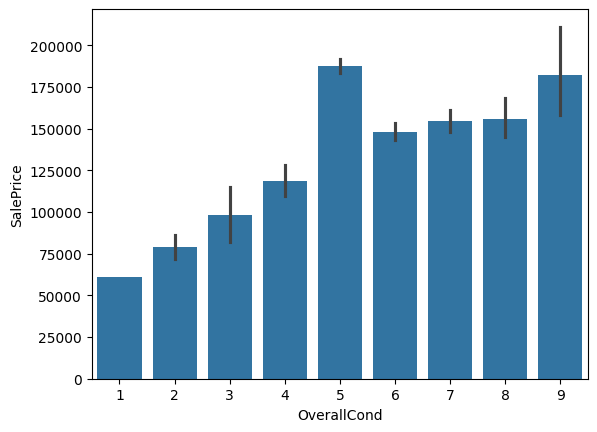

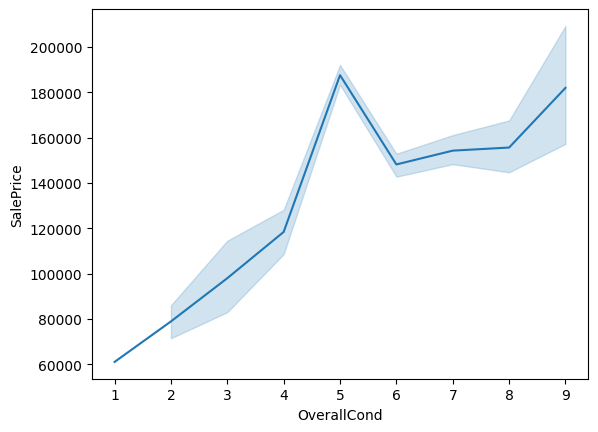

In [51]:
sns.barplot(
    data = df_full.loc[df_full.Outlier == False],
    x = df_full.OverallCond.name,
    y = df_full.SalePrice.name,
)
plt.show()
sns.lineplot(
    data = df_full.loc[df_full.Outlier == False],
    x = df_full.OverallCond.name,
    y = df_full.SalePrice.name,
)
plt.show()

From these graphs, the dip and then a slight increase are very apparent.

In [52]:
df_full.groupby(df_full.OverallCond).SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
OverallCond,,,,,,,,
1,1.0,61000.000000,NaN,61000.0,61000.0,61000.0,61000.0,61000.0
2,5.0,141986.400000,141342.813488,67000.0,76500.0,85000.0,87000.0,394432.0
3,25.0,101929.400000,44852.490403,35311.0,76000.0,89500.0,135000.0,200624.0
4,57.0,120438.438596,38922.525907,40000.0,92900.0,115000.0,143000.0,235000.0
5,821.0,203146.914738,85117.319416,34900.0,144000.0,185000.0,239686.0,745000.0
6,252.0,153961.591270,60737.969824,37900.0,124375.0,142750.0,171875.0,755000.0
7,205.0,158145.487805,53468.189431,79900.0,123500.0,145000.0,178000.0,402000.0
8,72.0,155651.736111,52375.144681,84500.0,125375.0,142500.0,170750.0,335000.0
9,22.0,216004.545455,96485.974689,110500.0,143500.0,176200.0,287875.0,475000.0
